Box-фильтр:

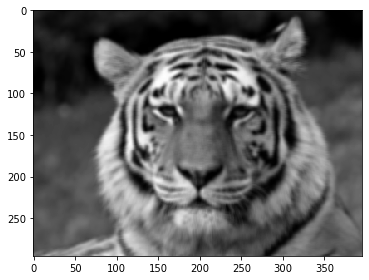

In [1]:
%matplotlib inline

from copy import copy
from skimage.io import imread, imshow, imsave
from skimage.transform import integral_image, integrate

k = 5
n = (k - 1) // 2
img = imread('tiger-gray-small.png')
out_img = copy(img[n:img.shape[0]-n, n:img.shape[1]-n])
ii = integral_image(img)
for i in range(n, img.shape[0] - n):
    for j in range(n, img.shape[1] - n):
        summ = integrate(ii, (i-n, j-n), (i+n, j+n))
        out_img[i-n, j-n] = summ / (k ** 2)
imshow(out_img)

Box-filter с использованием функции integrate не проходит по времени на stepik. Однако по времени проходит следующая реализация:

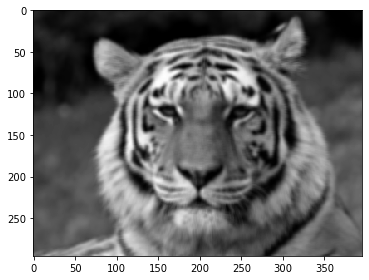

In [2]:
from scipy.signal import convolve2d
from numpy import array, clip


f = array([[1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1]])
out_img = convolve2d(img, f, mode='valid')
out_img = out_img / 25
out_img = out_img.astype('uint8')
imshow(out_img)

Гауссовский фильтр:

In [25]:
import math


def gauss_box(sig, x0, y0):
    filter_box = []
    for x in range(- sig * 3, sig * 3 + 1):
        filter_box.append([])
        for y in range(- sig * 3, sig * 3 + 1):
            gauss_value = (1/(2*math.pi*sig**2))*math.e**(-0.5*((x**2 + y**2)/sig**2))
            filter_box[x + sig*3].append(gauss_value)
    
    return filter_box[x0 + sig*3][y0+sig*3]


gauss_box(1, 1, 1)

0.05854983152431917

In [12]:
def print_gauss_box(sig):
    k = round(sig * 6) + 1
    S = 0
    filter_box = []
    for x in range(-(k // 2), k // 2 + 1):
        filter_box.append([])
        for y in range(-(k // 2), k // 2 +1):
            gauss_value = (1 / (2 * math.pi * math.pow(sig, 2))) * math.pow(math.e, ((-x ** 2 - y ** 2) / (2 * sig ** 2)))
            filter_box[x + k // 2].append(gauss_value)
            S += gauss_value
    for x in range(k):
        for y in range(k):
            filter_box[x][y] /= S
    for row in filter_box:
        for num in row:
            print('{:.5f}'.format(num), end=' ')
        print('\n')


In [13]:
print_gauss_box(0.33)

0.00010 0.00974 0.00010 

0.00974 0.96065 0.00974 

0.00010 0.00974 0.00010 



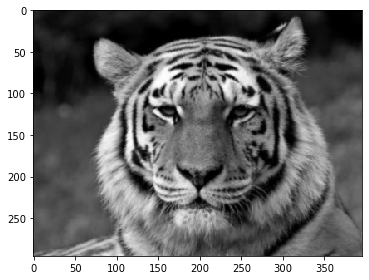

In [14]:
def gauss_filter(img, sig):
    k = round(sig * 6) + 1
    S = 0
    filter_box = []
    for x in range(-(k // 2), k // 2 + 1):
        filter_box.append([])
        for y in range(-(k // 2), k // 2 +1):
            gauss_value = (1 / (2 * math.pi * math.pow(sig, 2))) * math.pow(math.e, ((-x ** 2 - y ** 2) / (2 * sig ** 2)))
            filter_box[x + k // 2].append(gauss_value)
            S += gauss_value
    for x in range(k):
        for y in range(k):
            filter_box[x][y] /= S
    
    out_img = convolve2d(img, filter_box, mode='valid')
    out_img = out_img.astype('uint8')
    imshow(out_img)


img = imread('tiger-gray-small.png')
gauss_filter(img, 0.66)

Повышение резкости изображения:

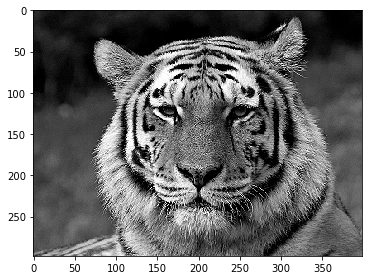

In [88]:
from numpy import ndarray

img = imread('tiger-gray-small.png')
f = array([[-1/10, -2/10, -1/10],
           [-2/10, 22/10, -2/10],
           [-1/10, -2/10, -1/10]])
out_img = ndarray(shape=(img.shape[0]-2, img.shape[1]-2), dtype=int)

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        sur = img[i-1: i+2, j-1: j+2]
        out_img[i-1, j-1] = int((f * sur).sum())

out_img = clip(out_img, 0, 255)
out_img = out_img.astype('uint8')
imshow(out_img)

In [89]:
from numpy import array_equal

img2 = imread('unsharp-tiger.png')
print(array_equal(img2, out_img))

True


Медианный фильтр:

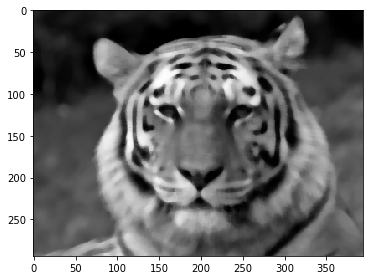

In [41]:
def median_filter(img):
    x = img.shape[0]
    y = img.shape[1]
    out_img = img.copy()
    out_img = out_img[3:x-3, 3:y-3]
    for i in range(3, x-3):
        for j in range(3, y-3):
            l = []
            sur = img[i-3: i+4, j-3: j+4]
            for k in range(49):
                l.append(sur.flat[k])
            l = sorted(l)
            median = l[24]
            out_img[i-3, j-3] = median
    return out_img


img = imread('tiger-gray-small.png')
imshow(median_filter(img))